<a href="https://colab.research.google.com/github/ClauCll/Curso_ML_A_Z/blob/master/Regresi%C3%B3n/Regresion_SVR_Bajas_MES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión con soporte máquina vectorial (SVR)
# objetivo: Predecir las bajas del mes

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gspread
from oauth2client.client import GoogleCredentials 
from google.colab import auth
# Autoriza Claudia
auth.authenticate_user()
gc = gspread.authorize (GoogleCredentials.get_application_default())

### leemos datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data1 = pd.read_csv('/content/drive/My Drive/Dataset/DBajas_PERIODO.txt',delimiter='~')
x = data1.iloc [:,:-1].values
y = data1.iloc [:,1].values

In [ ]:
pd.DataFrame(x)

### Codificar datos categóricos

In [ ]:
'''from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder  = LabelEncoder()
x[:,0] = labelencoder.fit_transform(x[:,0])
x[:,1] = labelencoder.fit_transform(x[:,1])
ct = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto'),[0,1])],remainder='passthrough')
x= np.array(ct.fit_transform(x),dtype=np.integer)'''

"from sklearn.preprocessing import LabelEncoder, OneHotEncoder\nfrom sklearn.compose import ColumnTransformer\nlabelencoder  = LabelEncoder()\nx[:,0] = labelencoder.fit_transform(x[:,0])\nx[:,1] = labelencoder.fit_transform(x[:,1])\nct = ColumnTransformer([('one_hot_encoder',OneHotEncoder(categories='auto'),[0,1])],remainder='passthrough')\nx= np.array(ct.fit_transform(x),dtype=np.integer)"

### Evitar la trampa de variables Dummy

In [ ]:
'''x = x[:,1:]'''

In [ ]:
pd.DataFrame(x)

### Dividimos los datos en entrenamiento y test

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.2, random_state=0)

### Escalamos los datos

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train= sc_x.fit_transform(x_train)
y_train= sc_y.fit_transform(y_train.reshape(-1,1))

In [ ]:
len(x_train[:,0])

In [ ]:
len(x_test[:,0])

In [21]:
muestra=np.array([])
y_muestra=np.array([])
for i in range(0, 7):
    muestra=np.append(muestra,([x_train[:,0][i]]))
    y_muestra=np.append(y_muestra,([y_train[:,0][i]]))

### MODELO SVR

In [22]:
from sklearn.svm import SVR
regression = SVR(kernel='rbf')
regression.fit(muestra.reshape(-1,1),y_muestra.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [23]:
x_valor=sc_x.inverse_transform(muestra)
y_valor= sc_y.inverse_transform(y_muestra)
y_predic_valor= sc_y.inverse_transform(regression.predict(muestra.reshape(-1,1)))

In [32]:
xx = []; yy = []; yy_predic=[]
ciclo= len(muestra)
for i in range(ciclo):
  xx.append([x_valor[i]])
  yy.append([y_valor[i]])
  yy_predic.append([y_predic_valor[i]])
print("x_valor = "+str(xx)+"\n")
print("y_valor = "+str(yy)+"\n")
print("y_predic"+str(yy_predic)+"\n")
# Concatenamos 
tabla = np.concatenate((xx, yy,yy_predic), axis=1)
print("Antes de organizar:"+"\n"+str(tabla)+"\n")
# Organizamos y recreamos tabla
tabla[:,0].sort()
for i in range(ciclo):
  n_orgz =  tabla[i,0]
  for ii in range(ciclo):
    n_norgz =  x_valor[ii]
    if (int(n_norgz) == int(n_orgz)):
      tabla[i,1] = y_valor[ii]
      tabla[i,2]= y_predic_valor[ii]
    else:
      pass 
print("Despues de organizar:"+"\n"+str(tabla)+"\n")

x_valor = [[201908.0], [201906.0], [201809.0], [202006.0], [201703.0], [202008.0], [201807.0]]

y_valor = [[19108.0], [19541.0], [21942.0], [20818.0], [42866.0], [25478.0], [23298.0]]

y_predic[[19763.69433368746], [19735.39123676838], [22597.69421816696], [22994.709848449987], [30106.826162874764], [23060.448852677513], [22746.517089506146]]

Antes de organizar:
[[201908.          19108.          19763.69433369]
 [201906.          19541.          19735.39123677]
 [201809.          21942.          22597.69421817]
 [202006.          20818.          22994.70984845]
 [201703.          42866.          30106.82616287]
 [202008.          25478.          23060.44885268]
 [201807.          23298.          22746.51708951]]

Despues de organizar:
[[201703.          42866.          30106.82616287]
 [201807.          23298.          22746.51708951]
 [201809.          21942.          22597.69421817]
 [201906.          19541.          19735.39123677]
 [201908.          19108.          19763.69433369

In [25]:
# Analizando datos de test
from sklearn.preprocessing import StandardScaler
sc_x_t = StandardScaler()
sc_y_t = StandardScaler()
x_test= sc_x_t.fit_transform(x_test)
y_test= sc_y_t.fit_transform(y_test.reshape(-1,1))

In [26]:
# MODELO SVR - Test
from sklearn.svm import SVR
regression = SVR(kernel='rbf')
regression.fit(x_test.reshape(-1,1),y_test.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [27]:
x_valor_t=sc_x_t.inverse_transform(x_test)
y_valor_t= sc_y_t.inverse_transform(y_test)
y_predic_valor_t= sc_y_t.inverse_transform(regression.predict(x_test.reshape(-1,1)))

In [ ]:
xx_t = []; yy_t =[]; yy_predic_t=[]
total_ciclo= len(x_test[:,0])
for i in range( total_ciclo ):
  xx_t.append(pd.DataFrame([x_valor_t[i]]))
  yy_t.append(pd.DataFrame([y_valor_t[i]]))
  yy_predic_t.append(pd.DataFrame([y_predic_valor_t[i]]))
print("x_valor_t = "+str(xx_t)+"\n")
print("y_valor_t = "+str(yy_t)+"\n")
print("y_predic_t"+str(yy_predic_t)+"\n")
# Concatenamos 
tabla_t = np.concatenate((xx_t, yy_t,yy_predic_t), axis=1)
print("Antes de organizar el test:"+"\n"+str(tabla_t)+"\n")
# Organizamos y recreamos tabla test
tabla_t[:,0].sort()
for i in range(total_ciclo) :
  n_orgz_t =  tabla_t[i,0]
  for ii in range( total_ciclo ):
    n_norgz_t =  x_valor_t[ii]
    if (int(n_norgz_t) == int(n_orgz_t)):
      tabla_t[i,1] = y_valor_t[ii]
      tabla_t[i,2]= y_predic_valor_t[ii]
    else:
      pass 
print("Despues de organizar:"+"\n"+str(tabla_t)+"\n")

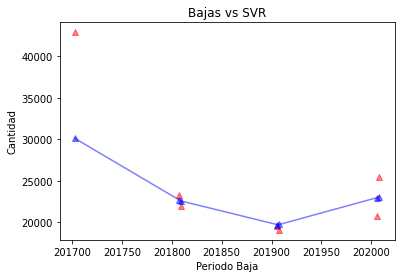

In [29]:
# Graficamos 
plt.scatter(tabla[:,0],tabla[:,1],color='Red', marker='^',alpha=0.5)
plt.plot(tabla[:,0],tabla[:,2],color='Blue', marker='^',alpha=0.5)
plt.title("Bajas vs SVR")
plt.xlabel("Periodo Baja")
plt.ylabel("Cantidad")
plt.show()

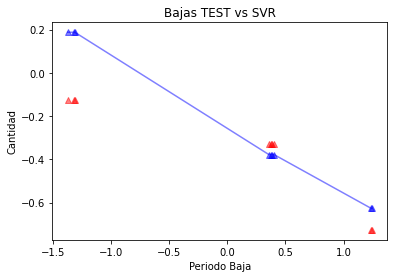

In [30]:
# Graficamos test
plt.scatter(tabla_t[:,0],tabla_t[:,1],color='Red', marker='^',alpha=0.5)
plt.plot(tabla_t[:,0],tabla_t[:,2],color='Blue', marker='^',alpha=0.5)
plt.title("Bajas TEST vs SVR")
plt.xlabel("Periodo Baja")
plt.ylabel("Cantidad")
plt.show()

In [17]:
'''nuevo= np.array([])
for i in range(202009 , 202012):
  nuevo= np.append(nuevo, i)
y_pred=sc_y.inverse_transform(regression.predict(sc_x.transform(nuevo.reshape(-1,1))))
pd.DataFrame(y_pred)'''

'nuevo= np.array([])\nfor i in range(202009 , 202012):\n  nuevo= np.append(nuevo, i)\ny_pred=sc_y.inverse_transform(regression.predict(sc_x.transform(nuevo.reshape(-1,1))))\npd.DataFrame(y_pred)'

In [36]:
type(tabla[1,1])

numpy.float64

In [38]:
type(calculo_error_muestra)

numpy.float64

In [43]:
type(x_train_muestra)

list

In [42]:
type(error_muestra)

list

In [56]:
np.array([error_muestra]).T

array([[29.76525413],
       [ 2.36708263],
       [ 2.98830653],
       [ 0.99478653],
       [ 3.43151734],
       [10.45590282],
       [ 9.48877913]])

In [46]:
x_train_muestra

[42866.0, 23298.0, 21942.0, 19541.0, 19108.0, 20818.0, 25478.0]

In [58]:
# Margen de Error entrenamiento
error_muestra= []; x_train_muestra=[]
for i in range(ciclo):
  calculo_error_muestra = (( tabla[i,1] - tabla[i,2] ) / tabla[i,1] ) * 100
  calculo_error_muestra = abs(calculo_error_muestra)
  error_muestra.append(calculo_error_muestra)
  x_train_muestra.append(tabla[i,1])
print("x train muestra = "+str(x_train_muestra)+"\n")
print("error_muestra = " +str(error_muestra)+"\n")
# Concatenamos 
var1=np.array([error_muestra]).T
var2=np.array([x_train_muestra]).T
tabla_error = np.concatenate((var2, var1),axis=1)
print("Antes de organizar los datos:"+str(tabla_error)+"\n")
# Organizamos y recreamos los datos
tabla_error[:,0].sort()
for i in range(ciclo) :
  n_orgz =  tabla_error[i,0]
  for ii in range( ciclo ):
    n_norgz =  x_train_muestra[ii]
    if (int(n_norgz) == int(n_orgz)):
      tabla_error[i,1] = error_muestra[ii]
    else:
      pass 
print("Despues de organizar los datos:"+"\n"+str(tabla_error)+"\n")

x train muestra = [42866.0, 23298.0, 21942.0, 19541.0, 19108.0, 20818.0, 25478.0]

error_muestra = [29.765254134104502, 2.3670826272377647, 2.9883065270575075, 0.9947865348159286, 3.4315173418853937, 10.455902817033277, 9.48877913228074]

Antes de organizar los datos:[[4.28660000e+04 2.97652541e+01]
 [2.32980000e+04 2.36708263e+00]
 [2.19420000e+04 2.98830653e+00]
 [1.95410000e+04 9.94786535e-01]
 [1.91080000e+04 3.43151734e+00]
 [2.08180000e+04 1.04559028e+01]
 [2.54780000e+04 9.48877913e+00]]

Despues de organizar los datos:
[[1.91080000e+04 3.43151734e+00]
 [1.95410000e+04 9.94786535e-01]
 [2.08180000e+04 1.04559028e+01]
 [2.19420000e+04 2.98830653e+00]
 [2.32980000e+04 2.36708263e+00]
 [2.54780000e+04 9.48877913e+00]
 [4.28660000e+04 2.97652541e+01]]



In [ ]:
pd.DataFrame(np.array([error_muestra]))

In [ ]:
type(x_train_muestra)

In [ ]:
# Graficamos error muestra
plt.plot(tabla[:,0],error_muestra,color='Red', marker='^',alpha=0.5)
plt.title("error entrenamiento")
plt.xlabel("Periodo")
plt.ylabel("Error")
plt.show()

In [ ]:
# Margen de error Test
error_test = [];
for i in range( total_ciclo ):
  calculo_error_test = (( tabla_t[i,1] - tabla_t[i,2] ) / tabla_t[i,1] ) * 100
  error_test.append(calculo_error_test)
print("error_test = "+str(error_test)+"\n")
# Organizamos y recreamos tabla 
error_test.sort()

In [ ]:
# Graficamos error test
plt.plot(tabla_t[:,0],error_test,color='Blue', marker='^',alpha=0.5)
plt.title("error test")
plt.xlabel("Periodo")
plt.ylabel("Error")
plt.show()

In [ ]:
# Graficamos error
plt.plot(error_muestra,color='Red', marker='^',alpha=0.5)
plt.plot(error_test,color='Blue', marker='^',alpha=0.5)
plt.title("error muestra vs error test")
plt.xlabel(" ")
plt.ylabel("Error")
plt.show()

In [ ]:
error_muestra

In [ ]:
error_test